# #Loading libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# #Importing dataset

In [36]:
data=pd.read_csv("train.csv")
test=pd.read_csv('test.csv')


In [37]:
data

,id,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,ID_1,-64,-56,-61,-66,-71,-82,-81,1
1,ID_2,-68,-57,-61,-65,-71,-85,-85,1
2,ID_3,-63,-60,-60,-67,-76,-85,-84,1
3,ID_4,-61,-60,-68,-62,-77,-90,-80,1
4,ID_5,-63,-65,-60,-63,-77,-81,-87,1
5,ID_6,-64,-55,-63,-66,-76,-88,-83,1
6,ID_7,-65,-61,-65,-67,-69,-87,-84,1
7,ID_8,-61,-63,-58,-66,-74,-87,-82,1
8,ID_9,-65,-60,-59,-63,-76,-86,-82,1
9,ID_10,-62,-60,-66,-68,-80,-86,-91,1


In [38]:
data.columns

Index(['id', 'wifi1', 'wifi2', 'wifi3', 'wifi4', 'wifi5', 'wifi6', 'wifi7',
       'room'],
      dtype='object')

Info gives us the information about the datavalues other than null values and type of data of features. This can help us to find out if some data is missing in testset and dataset. 

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
ID_1     499 non-null object
-62      499 non-null int64
-51      499 non-null int64
-54      499 non-null int64
-60      499 non-null int64
-74      499 non-null int64
-74.1    499 non-null int64
-82      499 non-null int64
dtypes: int64(7), object(1)
memory usage: 31.3+ KB


In [ ]:
data.info()

In [40]:
data.describe()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-52.319333,-55.95800,-55.319333,-53.800667,-62.905333,-81.188000,-81.973333,2.500000
std,11.672883,3.37834,5.132666,11.732435,9.127024,6.679002,6.676002,1.118407
min,-74.000000,-74.00000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.00000,-58.250000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.00000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-54.00000,-52.000000,-47.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-46.00000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


Describe gives us all the statistical information about the dataset from which we observed that the data is in about same range. So no scaling is required.

# #Data Visualization

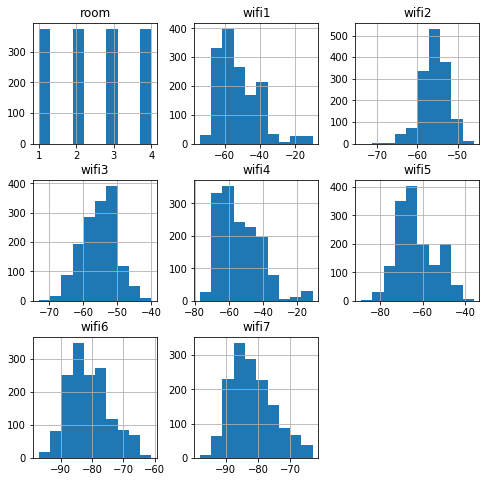

In [42]:
import matplotlib.pyplot as plt
data.hist(figsize=(8,8))
plt.show()

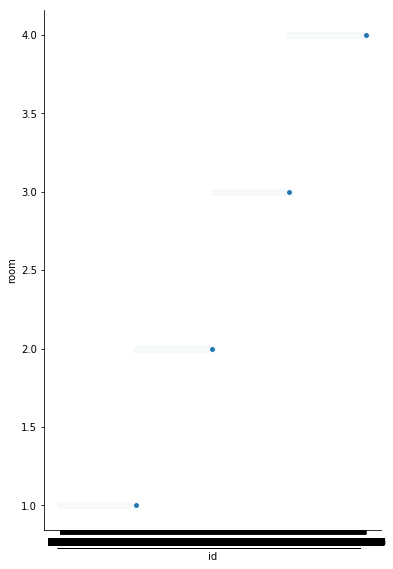

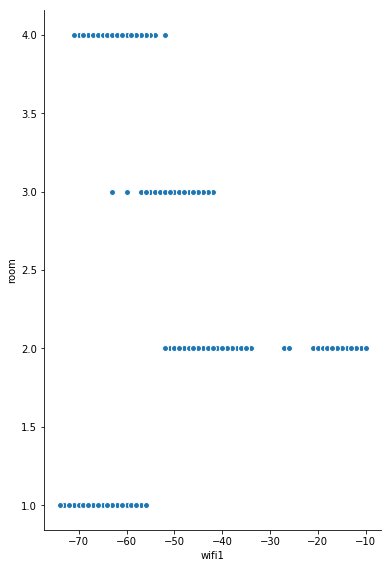

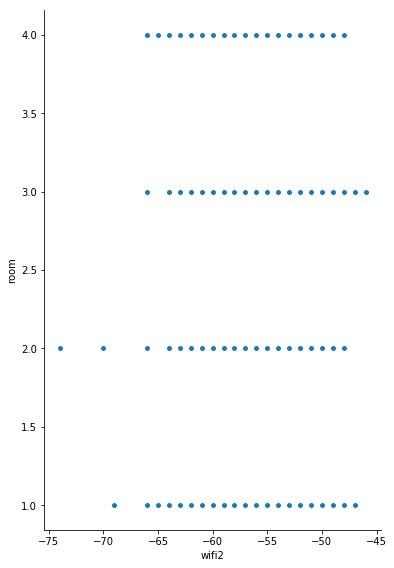

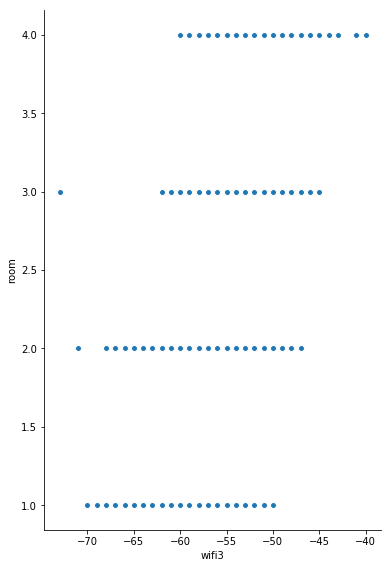

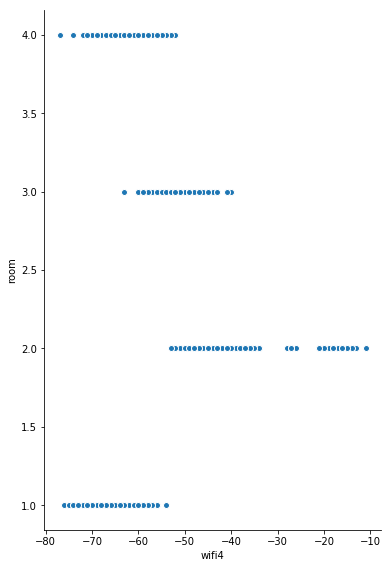

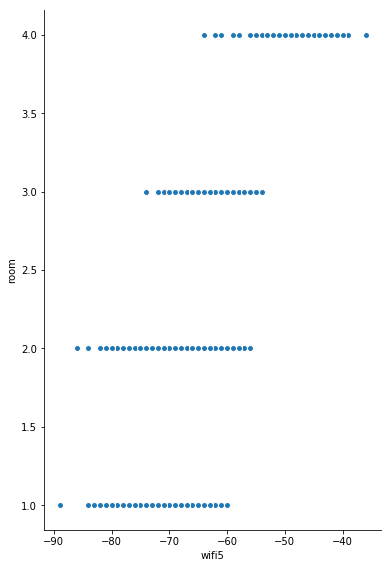

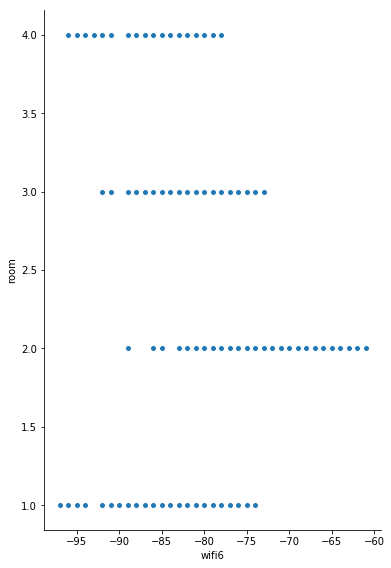

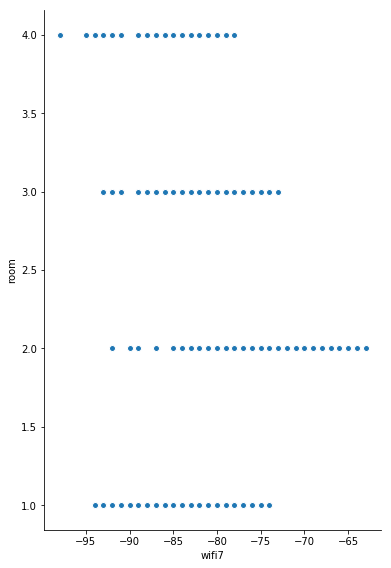

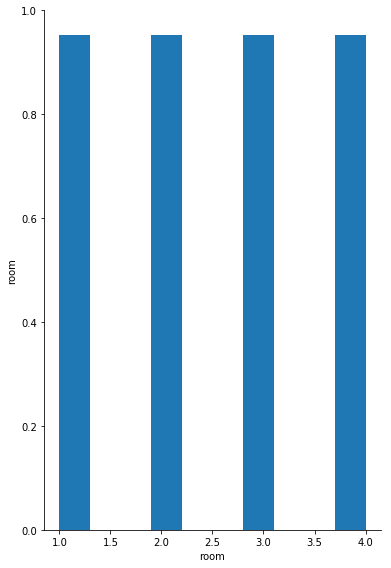

In [43]:
import seaborn as sns
for var in data.columns:
    sns.pairplot(data, x_vars=var,y_vars='room',size=8,aspect=0.7)
    plt.show()
    print()

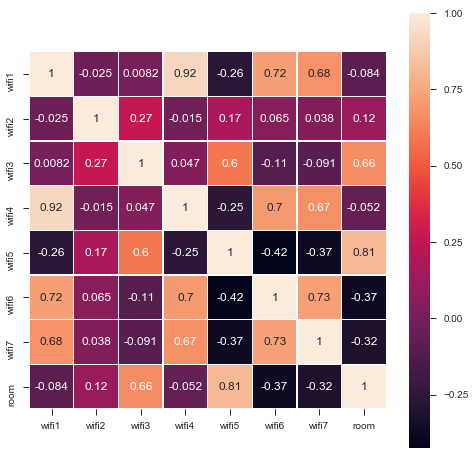

In [53]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,8))

corr=data.corr()
sns.set(style='ticks',color_codes=True)
sns.heatmap(corr,linewidths=0.3,square=True,linecolor='white',annot=True)
plt.show()

Counted the number of datasets for different number of categories of room so as to get a glance of how the data is distributed.

In [44]:
p1=0
p2=0
p3=0
p4=0
room_c=data['room']
room_c

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1470    4
1471    4
1472    4
1473    4
1474    4
1475    4
1476    4
1477    4
1478    4
1479    4
1480    4
1481    4
1482    4
1483    4
1484    4
1485    4
1486    4
1487    4
1488    4
1489    4
1490    4
1491    4
1492    4
1493    4
1494    4
1495    4
1496    4
1497    4
1498    4
1499    4
Name: room, Length: 1500, dtype: int64

In [45]:
for i in range(0,1500):
    if room_c[i]==1:
        p1+=1
    if room_c[i]==2:
        p2+=1
    if room_c[i]==3:
        p3+=1
    if room_c[i]==4:
        p4+=1

In [46]:
print(p1)
print(p2)
print(p3)
print(p4)

375
375
375
375


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
knn=KNeighborsClassifier(n_neighbors=7,weights='distance')
sv=SVC(kernel='linear')
dt=DecisionTreeClassifier()
X=data.drop(['room','id'],axis=1)
y=data['room']
cv_scores=cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

[0.97333333 0.99       0.97666667 0.97333333 0.98      ]
0.9786666666666666


In [49]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=10)
knn.fit(train_x,train_y)
pred=knn.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.9755555555555555
[[113   0   1   0]
 [  0  97   6   0]
 [  2   1 110   1]
 [  0   0   0 119]]
             precision    recall  f1-score   support

          1       0.98      0.99      0.99       114
          2       0.99      0.94      0.97       103
          3       0.94      0.96      0.95       114
          4       0.99      1.00      1.00       119

avg / total       0.98      0.98      0.98       450



In [50]:
test

,ID_1,-62,-51,-54,-60,-74,-74.1,-82
0,ID_2,-57,-54,-51,-60,-47,-84,-88
1,ID_3,-56,-55,-44,-60,-51,-84,-86
2,ID_4,-19,-60,-54,-35,-69,-69,-78
3,ID_5,-67,-56,-60,-66,-73,-93,-87
4,ID_6,-52,-53,-56,-49,-62,-83,-80
5,ID_7,-69,-59,-70,-67,-75,-82,-82
6,ID_8,-61,-51,-52,-56,-47,-86,-90
7,ID_9,-15,-55,-62,-25,-71,-67,-68
8,ID_10,-38,-54,-55,-36,-60,-71,-75
9,ID_11,-51,-55,-50,-53,-62,-78,-84


In [51]:
print(test)
idn=test['id']
print(idn)

       ID_1  -62  -51  -54  -60  -74  -74.1  -82
0      ID_2  -57  -54  -51  -60  -47    -84  -88
1      ID_3  -56  -55  -44  -60  -51    -84  -86
2      ID_4  -19  -60  -54  -35  -69    -69  -78
3      ID_5  -67  -56  -60  -66  -73    -93  -87
4      ID_6  -52  -53  -56  -49  -62    -83  -80
5      ID_7  -69  -59  -70  -67  -75    -82  -82
6      ID_8  -61  -51  -52  -56  -47    -86  -90
7      ID_9  -15  -55  -62  -25  -71    -67  -68
8     ID_10  -38  -54  -55  -36  -60    -71  -75
9     ID_11  -51  -55  -50  -53  -62    -78  -84
10    ID_12  -56  -54  -50  -58  -50    -83  -85
11    ID_13  -55  -54  -46  -60  -50    -84  -86
12    ID_14  -44  -50  -57  -45  -61    -72  -67
13    ID_15  -68  -56  -65  -67  -76    -87  -85
14    ID_16  -48  -55  -53  -51  -63    -82  -86
15    ID_17  -53  -58  -51  -51  -62    -84  -85
16    ID_18  -47  -58  -51  -43  -65    -80  -80
17    ID_19  -63  -58  -58  -64  -66    -81  -83
18    ID_20  -51  -54  -44  -52  -56    -79  -79
19    ID_21  -40  -5

KeyError: 'id'

In [ ]:
test.drop(['id'],axis=1,inplace=True)
prediction=knn.predict(test)

In [ ]:
prediction

In [ ]:
predi=pd.DataFrame(prediction)
predi.rename(columns={0:'Room'},inplace=True)
predi['Id']=idn
predi = predi[['Id','Room']]

In [ ]:
print(predi)

In [ ]:
predi.to_csv('wifi_result.csv',index=False)

In [ ]:
re=pd.read_csv('wifi_result.csv')
print(re)